In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data=sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
r=['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']
for i in r:
    data[i]=le.fit_transform(data[i])
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,8,14,4,1,0
1,6,9,4,1,0
2,4,11,3,1,0
3,3,10,5,1,0
4,7,15,4,1,0
...,...,...,...,...,...
145,24,9,28,19,2
146,20,4,26,15,2
147,22,9,28,16,2
148,19,13,30,19,2


In [7]:
x=data.drop('species',axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,8,14,4,1
1,6,9,4,1
2,4,11,3,1
3,3,10,5,1
4,7,15,4,1
...,...,...,...,...
145,24,9,28,19
146,20,4,26,15
147,22,9,28,16
148,19,13,30,19


In [8]:
y=data['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
re=LogisticRegression()
re.fit(xtrain,ytrain)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score
d=re.predict(xtest)
d

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [12]:
a=accuracy_score(ytest,d)*100
a

100.0

In [13]:
d1=re.predict(xtrain)
d1

array([2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [14]:
a1=accuracy_score(ytrain,d1)*100
a1

97.5

In [15]:
p=[[19,13,30,19]]
w2=re.predict(p)
w2

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [16]:
data['species'].unique()

array([0, 1, 2])

In [17]:
if w2 ==0:
    print('setosa') 
elif w2 == 1:
    print('versicolor')
else:
    print('virginica')

virginica


In [18]:
from sklearn.tree import DecisionTreeClassifier
c=DecisionTreeClassifier(criterion='entropy')
c.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy')

In [19]:
accuracy=accuracy_score(ytest,d)*100
accuracy

100.0

In [20]:
e=re.predict(xtrain)
e

array([2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [21]:
a2=accuracy_score(ytrain,e)*100
a2

97.5

In [22]:
z=[[7,15,4,1]]
w=re.predict(z)
w

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [23]:
if w ==0:
    print('setosa') 
elif w == 1:
    print('versicolor')
else:
    print('virginica')

setosa


<function matplotlib.pyplot.show(close=None, block=None)>

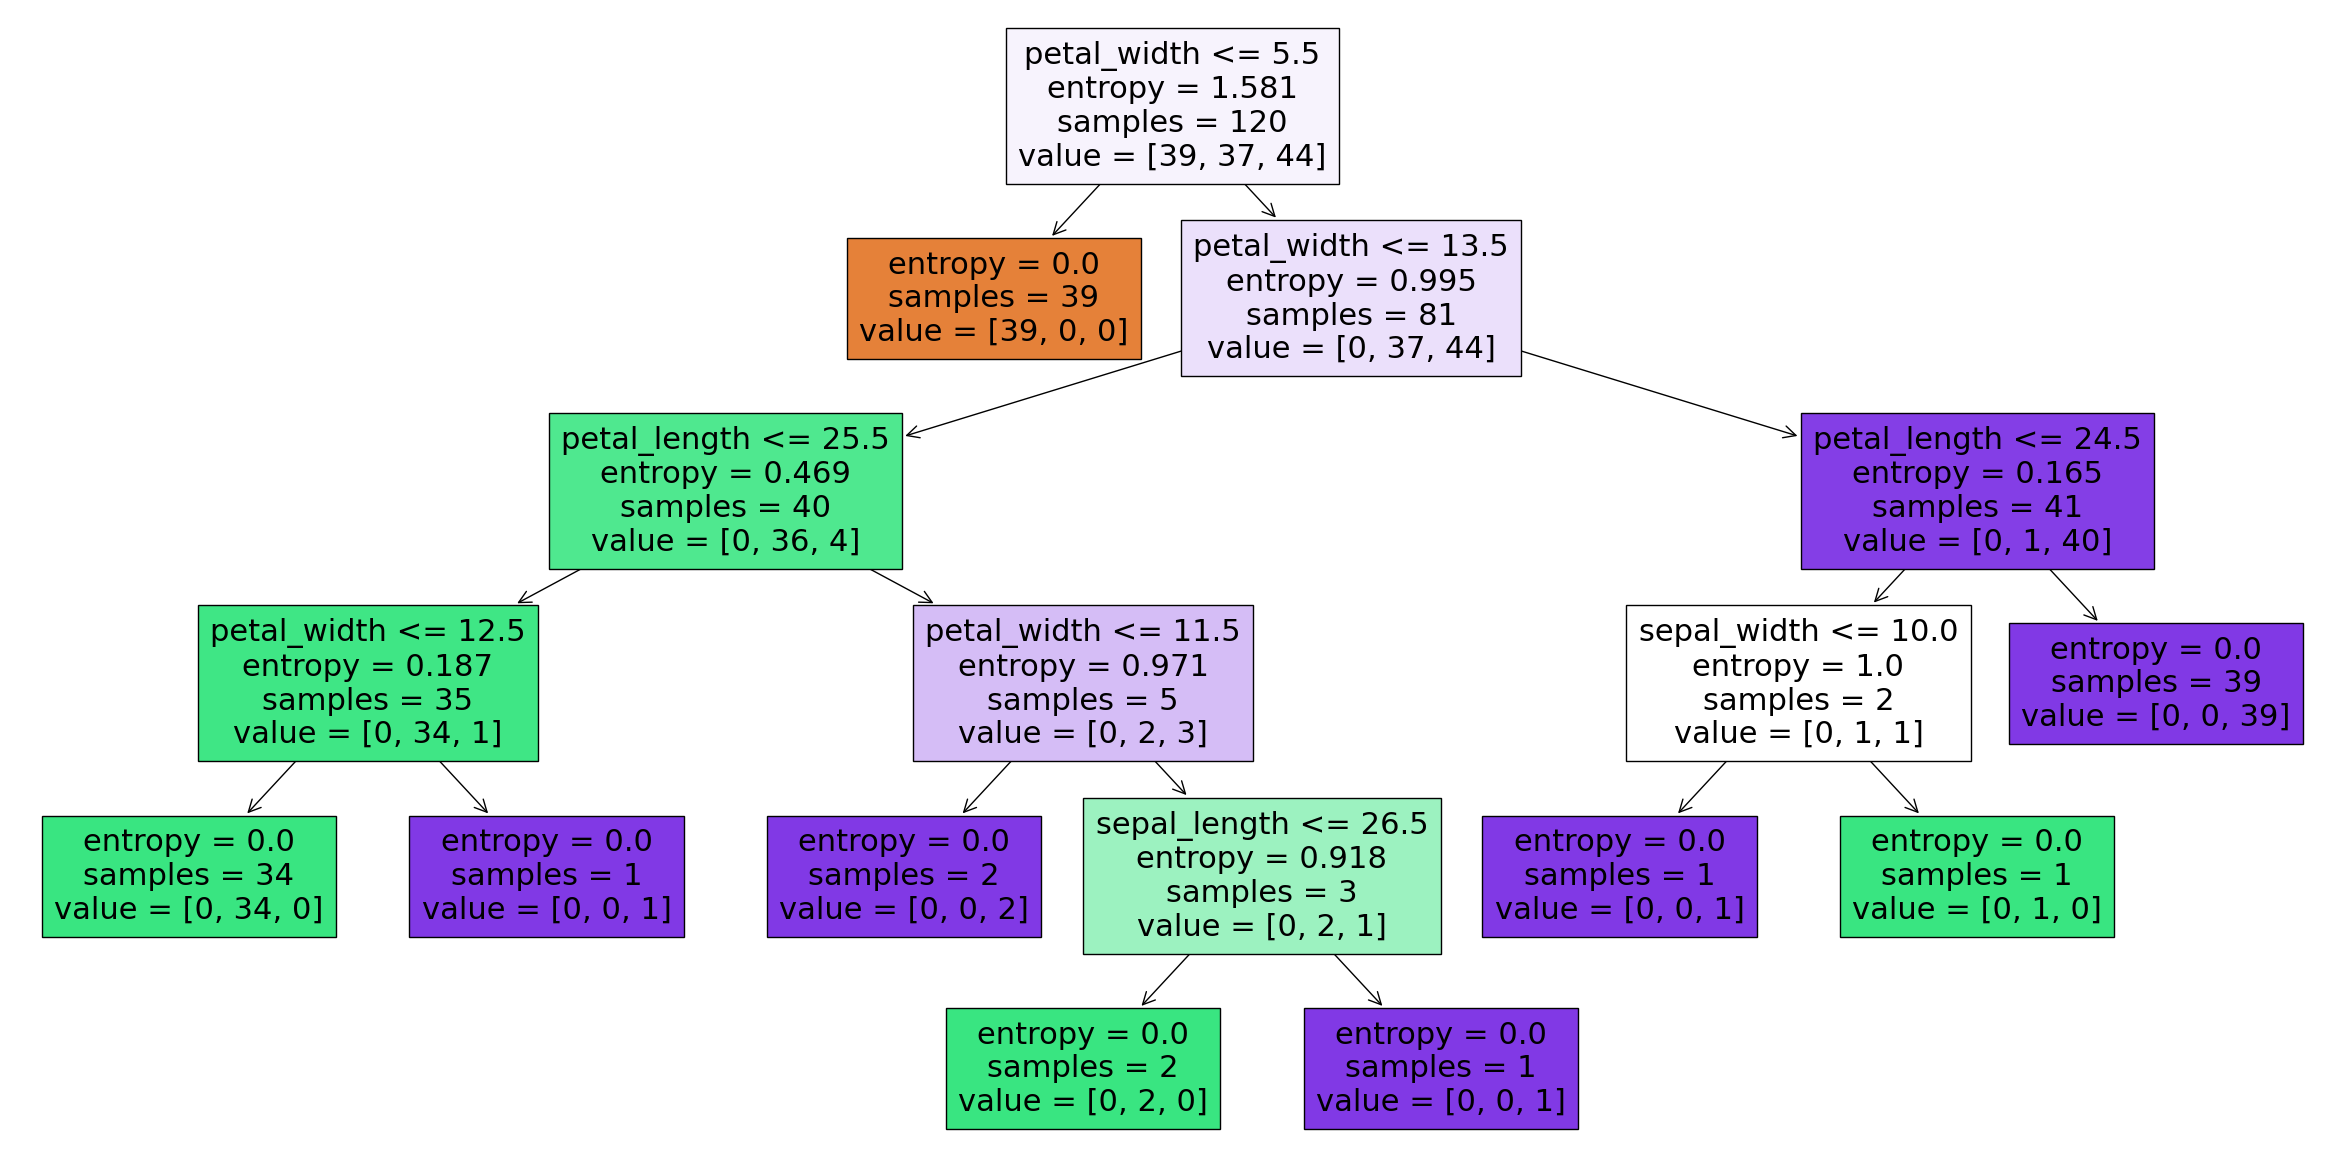

In [24]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(30,15))
tree.plot_tree(c,max_depth=8,filled=True,feature_names=x.columns.tolist())
plt.show

In [25]:
from sklearn.ensemble import RandomForestClassifier
cf=RandomForestClassifier()
cf.fit(xtrain,ytrain)

RandomForestClassifier()

In [26]:
accuracy2=accuracy_score(ytest,d)*100
accuracy2

100.0

In [27]:
f=cf.predict(xtrain)
f

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [28]:
a3=accuracy_score(ytrain,f)*100
a3

100.0

In [29]:
w=[[7,15,4,1]]
w2=cf.predict(w)
w2

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [30]:
if w2 ==0:
    print('setosa') 
elif w2 == 1:
    print('versicolor')
else:
    print('virginica')

setosa


In [31]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

In [32]:
accuracy=(sv.score(xtest,ytest))*100
accuracy

100.0

In [33]:
predict=(sv.score(xtrain,ytrain))*100
predict

98.33333333333333

In [34]:
w3=[[7,15,4,1]]
wi=sv.predict(w3)
wi

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [35]:
from sklearn.neighbors import KNeighborsClassifier
sq=KNeighborsClassifier()
sq.fit(xtrain,ytrain)

KNeighborsClassifier()

In [36]:
from sklearn.metrics import accuracy_score
d=sq.predict(xtest)
d

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [37]:
accuracy=accuracy_score(ytest,d)*100
accuracy

96.66666666666667

In [38]:
d2=sq.predict(xtrain)
d2

array([2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [39]:
acc=accuracy_score(ytrain,d2)*100
acc

95.0

In [40]:
az=[[8,14,4,1]]
w=sq.predict(az)
w

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [41]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
g=GaussianNB()
g.fit(xtrain,ytrain)

GaussianNB()

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [43]:
from sklearn.metrics import accuracy_score
dq=g.predict(xtest)
dq


array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [44]:
wq=(accuracy_score(ytest,dq))*100
wq

100.0

In [45]:
eq=g.predict(xtrain)
eq

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [46]:
wqq=(accuracy_score(ytrain,eq))*100
wqq

95.0

In [47]:
ro=[[7,15,4,1]]
wi=g.predict(ro)
wi

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [48]:
q=BernoulliNB()
q.fit(xtrain,ytrain)

BernoulliNB()

In [49]:
from sklearn.metrics import accuracy_score
ri=q.predict(xtrain)
ri

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2])

In [50]:
rb=(accuracy_score(ytrain,ri))*100
rb

40.833333333333336

In [51]:
wee=q.predict(xtest)
wee

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [52]:
wer=(accuracy_score(ytest,wee))*100
wer

23.333333333333332

In [53]:
qd=[[7,15,4,1]]
wf=q.predict(qd)
wf

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([2])

In [54]:
mn=MultinomialNB()
mn.fit(xtrain,ytrain)

MultinomialNB()

In [55]:
from sklearn.metrics import accuracy_score
s=mn.predict(xtrain)
s

array([2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2,
       0, 0, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 2, 1, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 1,
       1, 2, 2, 0, 0, 0, 2, 1, 1, 0])

In [56]:
dr=(accuracy_score(ytrain,s))*100
dr

80.0

In [57]:
x1=mn.predict(xtest)
x1

array([2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 2, 0])

In [58]:
yr=(accuracy_score(ytest,x1))*100
yr

86.66666666666667

In [59]:
h=[[7,15,4,1]]
rr=mn.predict(h)
rr

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([0])

In [60]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

fg=AdaBoostClassifier()
fg.fit(xtrain,ytrain)

AdaBoostClassifier()

In [61]:
from sklearn.metrics import accuracy_score
ds=fg.predict(xtrain)
ds

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 0, 1,
       1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [62]:
sdd=(accuracy_score(ytrain,ds))*100
sdd

95.83333333333334

In [63]:
fdd=fg.predict(xtest)
fdd

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [64]:
dff=(accuracy_score(ytest,fdd))*100
dff

96.66666666666667

In [65]:
j=[[7,15,4,1]]
hgg=fg.predict(j)
hgg

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([0])

In [73]:
yh=GradientBoostingClassifier()
yh.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [75]:
y8=yh.predict(xtrain)
y8

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [76]:
y8i=(accuracy_score(ytrain,y8))*100
y8i

100.0

In [77]:
y9=yh.predict(xtest)
y9

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [78]:
y9i=(accuracy_score(ytest,y9))*100
y9i

100.0

In [79]:
wm=[[7,15,4,1]]
lk=yh.predict(wm)
lk

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0])

In [74]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [67]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [68]:
FG=xgb.predict(xtrain)
FG

array([2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 0, 0, 2, 1, 2, 0], dtype=int64)

In [69]:
tr=(accuracy_score(ytrain,FG))*100
tr

100.0

In [70]:
GF=xgb.predict(xtest)
GF

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [71]:
TR=(accuracy_score(ytest,GF))*100
TR

100.0

In [72]:
VF=[[7,15,4,1]]
gt=xgb.predict(VF)
gt

array([0], dtype=int64)